### 1. Facebook Regression

The [following Facebook dataset](https://docs.google.com/spreadsheets/d/1B2xkgo7clRcNRbIjBZT4MaleCxm6vjeZa5rhoAANo9E/edit?usp=sharing) has been prepared.

**Here is a short sample of the data:**

| `total_followers` | `type`  | `category` | `month` | `weekday` | `hour` | `paid` | `comment` | `like` | `share` |
| :---------------- | ------- | ---------- | ------- | --------- | ------ | ------ | --------- | ------ | ------- |
| `136909`          | `Photo` | `1`        | `10`    | `1`       | `24`   | `0`    | `14`      | `404`  | `104`   |
| `136737`          | `Photo` | `1`        | `10`    | `1`       | `23`   | `1`    | `0`       | `0`    | `0`     |
| `137310`          | `Photo` | `2`        | `10`    | `1`       | `17`   | `0`    | `31`      | `1723` | `115`   |
| `136617`          | `Photo` | `3`        | `10`    | `7`       | `24`   | `0`    | `2`       | `76`   | `17`    |
| `136799`          | `Photo` | `1`        | `10`    | `7`       | `18`   | `0`    | `0`       | `15`   | `4`     |
| `136693`          | `Photo` | `1`        | `10`    | `6`       | `1`    | `1`    | `4`       | `72`   | `10`    |
| `136291`          | `Photo` | `1`        | `10`    | `6`       | `18`   | `0`    | `51`      | `1165` | `167`   |



**The input variables:**

- `total_followers`: The number of followers of the group.

- `type`: Specifies whether it is of type "photo," "status," or "link."

- `category`: There are three distinct categories; 1, 2, and 3.

- `month`: The month that the post was created.

- `weekday`: The day of the week that the post was created.

- `paid`: A 0/1 flag indicating whether the post was a paid-for promotion. 

  

**The output variables:**

- `comment`: The number of comments that the post generated.

- `like`: The number of likes that the post generated.

- `share`: The number of shares that the post generated.

  

**Now, do the following:**

1. Build a regression model by minimizing the mean squared error (MSE) to predict any of the:
   - comments,
   - likes,
   - shares.
2. Using your model, quantify how much the different input variables predict the influence of a post. Is there any interesting or unexpected behavior that your model predicts?
3. Make sure that your model is easily-accessible when in class and is able to predict new data of the same format, and quantify how well your model is doing. Ideally, this will include plots of the new data and your predictions.

**The data set is slightly modified from the original:**

*Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. Journal of Business Research, 69(9), 3341-3351*

#### Build a regression model by minimizing the mean squared error (MSE) to predict any of the comments, likes, and shares.

In [61]:
import numpy as np
import pandas as pd

# def name_to_num(x):
#     if x == "Photo":
#         return 1
#     elif x == "Status":
#         return 3
#     elif x == "Video":
#         return 2
#     else:
#         return 4

df = pd.read_csv('facebook_train - facebook_train.csv')
df1 = pd.get_dummies(df["type"])
df2 = pd.get_dummies(df["category"], prefix = "category")
result = pd.concat([df, df1, df2], axis = 1)
df = result
# df["type"] = df["type"].apply(name_to_num)
# # print(df) # to check whether data is loaded
result

,total_followers,type,category,month,weekday,hour,paid,comment,like,share,Link,Photo,Status,Video,category_1,category_2,category_3
0,124050,Photo,3,6,4,17,1,3,77,16,0,1,0,0,0,0,1
1,132556,Photo,2,8,3,24,0,11,313,50,0,1,0,0,0,1,0
2,92786,Photo,2,2,6,17,1,2,145,39,0,1,0,0,0,1,0
3,135632,Photo,1,9,2,1,0,2,299,49,0,1,0,0,1,0,0
4,139540,Link,1,12,3,17,1,7,229,21,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,138114,Status,2,12,2,1,0,12,498,87,0,0,1,0,0,1,0
393,127937,Status,2,6,3,18,0,4,85,20,0,0,1,0,0,1,0
394,135656,Video,1,9,6,24,0,7,397,143,0,0,0,1,1,0,0
395,124663,Photo,3,6,3,16,1,1,87,18,0,1,0,0,0,0,1


In [62]:
from sklearn.linear_model import LinearRegression
X, y_comments = df[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]],df["comment"]
X, y_likes = df[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]],df["like"]
X, y_shares = df[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]],df["share"]

model1 = LinearRegression()
model1.fit(X, y_comments)
model2 = LinearRegression()
model2.fit(X, y_likes)
model3 = LinearRegression()
model3.fit(X, y_shares)
print(model1.coef_)
print(model2.coef_)
print(model3.coef_)

[ 3.77005902e-04 -1.86102291e+00  8.55061113e-01  4.74910690e+00
 -1.52520489e+00  6.29586936e-01 -4.27390976e+00  5.16952771e+00
 -3.04762361e+00  5.85412821e+00 -2.80650459e+00]
[ 3.39471212e-03 -1.22018498e+01  7.41165027e+00  1.14937948e+02
 -3.17448222e+01  1.76743786e+01 -6.67848737e+01  8.08553174e+01
 -8.73776827e+01  6.07128030e+01  2.66648797e+01]
[ 2.91679153e-04 -1.84086641e+00  1.64960234e+00  1.03995973e+01
 -1.09788051e+01 -7.47700141e+00 -1.11103503e+01  2.95661569e+01
 -1.42484365e+01  1.09479388e+01  3.30049762e+00]


In [63]:
importance_comments = model1.coef_
# summarize feature importance
for i,v in enumerate(importance_comments):
	print('Comment Model\'s','{}, Score: {}'.format(list(X.columns.values)[i], v))

Comment Model's total_followers, Score: 0.0003770059016340842
Comment Model's month, Score: -1.8610229133223026
Comment Model's weekday, Score: 0.8550611125664871
Comment Model's paid, Score: 4.749106895245403
Comment Model's Link, Score: -1.525204888790249
Comment Model's Photo, Score: 0.629586936312897
Comment Model's Status, Score: -4.273909756007426
Comment Model's Video, Score: 5.169527708484829
Comment Model's category_1, Score: -3.0476236134193058
Comment Model's category_2, Score: 5.854128207018799
Comment Model's category_3, Score: -2.8065045935994624


In [64]:
importance_likes = model2.coef_
# summarize feature importance
for i,v in enumerate(importance_likes):
	print('Like Model\'s','{}, Score: {}'.format(list(X.columns.values)[i], v))

Like Model's total_followers, Score: 0.0033947121205569566
Like Model's month, Score: -12.201849752326334
Like Model's weekday, Score: 7.411650272504542
Like Model's paid, Score: 114.93794835734737
Like Model's Link, Score: -31.744822211482266
Like Model's Photo, Score: 17.674378600445586
Like Model's Status, Score: -66.78487374753281
Like Model's Video, Score: 80.85531735857039
Like Model's category_1, Score: -87.3776826751882
Like Model's category_2, Score: 60.71280298053571
Like Model's category_3, Score: 26.664879694652942


In [65]:
importance_shares = model3.coef_
# summarize feature importance
for i,v in enumerate(importance_shares):
	print('Share Model\'s','{}, Score: {}'.format(list(X.columns.values)[i], v))

Share Model's total_followers, Score: 0.00029167915262389506
Share Model's month, Score: -1.8408664062934417
Share Model's weekday, Score: 1.6496023376560458
Share Model's paid, Score: 10.39959728017834
Share Model's Link, Score: -10.978805104830297
Share Model's Photo, Score: -7.477001409407877
Share Model's Status, Score: -11.110350343384434
Share Model's Video, Score: 29.566156857622897
Share Model's category_1, Score: -14.248436462784092
Share Model's category_2, Score: 10.947938846678685
Share Model's category_3, Score: 3.3004976161055426


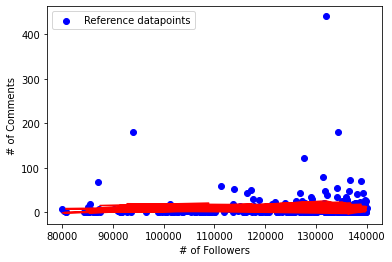

In [66]:
import matplotlib.pyplot as plt
plt.scatter(X["total_followers"], y_comments, marker = 'o', color='blue', label = "Reference datapoints")
plt.plot(X["total_followers"], model1.predict(X),color='red')
plt.legend()
# X-label
plt.xlabel('# of Followers')
# Y-label
plt.ylabel('# of Comments')
# Show the Plot
plt.show()

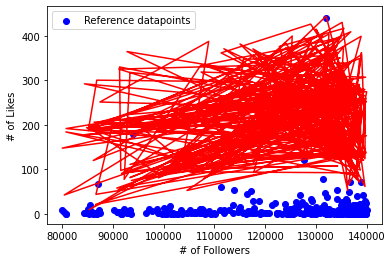

In [67]:
import matplotlib.pyplot as plt
plt.scatter(X["total_followers"], y_comments, marker = 'o', color='blue', label = "Reference datapoints")
plt.plot(X["total_followers"], model2.predict(X),color='red')
plt.legend()
# X-label
plt.xlabel('# of Followers')
# Y-label
plt.ylabel('# of Likes')
# Show the Plot
plt.show()

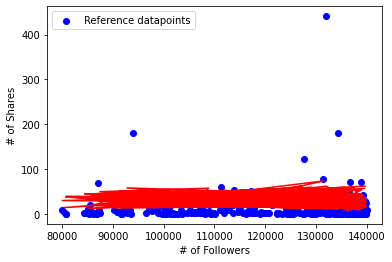

In [68]:
import matplotlib.pyplot as plt
plt.scatter(X["total_followers"], y_comments, marker = 'o', color='blue', label = "Reference datapoints")
plt.plot(X["total_followers"], model3.predict(X),color='red')
plt.legend()
# X-label
plt.xlabel('# of Followers')
# Y-label
plt.ylabel('# of Shares')
# Show the Plot
plt.show()

In [69]:
# Evaluation of Test Data Model 1
df_test = pd.read_csv('facebook_test.csv')
df_test1 = pd.get_dummies(df["type"])
df_test2 = pd.get_dummies(df["category"], prefix = "category")
result = pd.concat([df_test, df_test1, df_test2], axis = 1)
df_test = result
df_test = df_test.dropna()
df_test
X, y_comments_test = df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]],df_test["comment"]
model1.score(X, y_comments_test)



from sklearn.metrics import mean_squared_error
comments_trained = model1.predict(df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]])
print("MSE is:",mean_squared_error(comments_trained, df_test["comment"]))

from sklearn.metrics import mean_absolute_error
comments_trained = model1.predict(df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]])
print("Mean AE is:",mean_absolute_error(comments_trained, df_test["comment"]))

from sklearn.metrics import median_absolute_error
comments_trained = model1.predict(df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]])
print("Median AE is:",median_absolute_error(comments_trained, df_test["comment"]))

from sklearn.metrics import r2_score
comments_trained = model1.predict(df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]])
print("R^2 is:",r2_score(comments_trained, df_test["comment"]))

MSE is: 107.82933735662091
Mean AE is: 8.688736060706931
Median AE is: 7.280995651650159
R^2 is: -2.796198844429704


In [70]:
# Evaluation of Test Data Model 2
df_test = pd.read_csv('facebook_test.csv')
df_test1 = pd.get_dummies(df["type"])
df_test2 = pd.get_dummies(df["category"], prefix = "category")
result = pd.concat([df_test, df_test1, df_test2], axis = 1)
df_test = result
df_test = df_test.dropna()
df_test
X, y_likes_test = df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]],df_test["like"]
model2.score(X, y_likes_test)

from sklearn.metrics import mean_squared_error
likes_trained = model2.predict(df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]])
print("MSE is:",mean_squared_error(likes_trained, df_test["like"]))

from sklearn.metrics import mean_absolute_error
likes_trained = model2.predict(df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]])
print("Mean AE is:",mean_absolute_error(likes_trained, df_test["like"]))

from sklearn.metrics import median_absolute_error
likes_trained = model2.predict(df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]])
print("Median AE is:",median_absolute_error(likes_trained, df_test["like"]))

from sklearn.metrics import r2_score
likes_trained = model2.predict(df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]])
print("R^2 is:",r2_score(likes_trained, df_test["like"]))

MSE is: 56756.57375648442
Mean AE is: 159.28161489682532
Median AE is: 135.45335014627315
R^2 is: -6.495921212256923


In [71]:
# Evaluation of Test Data Model 3
df_test = pd.read_csv('facebook_test.csv')
df_test1 = pd.get_dummies(df["type"])
df_test2 = pd.get_dummies(df["category"], prefix = "category")
result = pd.concat([df_test, df_test1, df_test2], axis = 1)
df_test = result
df_test = df_test.dropna()
df_test
X, y_shares_test = df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]],df_test["share"]
model3.score(X, y_shares_test)


from sklearn.metrics import mean_squared_error
shares_trained = model3.predict(df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]])
print("MSE is:",mean_squared_error(shares_trained, df_test["share"]))

from sklearn.metrics import mean_absolute_error
shares_trained = model3.predict(df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]])
print("Mean AE is:",mean_absolute_error(shares_trained, df_test["share"]))

from sklearn.metrics import median_absolute_error
shares_trained = model3.predict(df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]])
print("Median AE is:",median_absolute_error(shares_trained, df_test["share"]))

from sklearn.metrics import r2_score
shares_trained = model3.predict(df_test[["total_followers","month","weekday","paid","Link","Photo","Status","Video","category_1","category_2","category_3"]])
print("R^2 is:",r2_score(shares_trained, df_test["share"]))

MSE is: 780.2169954087325
Mean AE is: 21.803327216573646
Median AE is: 18.73818936527185
R^2 is: -4.026532770041147


### 2. Casualty Classification

The [following road casualities dataset](https://docs.google.com/spreadsheets/d/1lOt3ktFmX0fiWa89dLUiKfv1zoYjyI23zo3Ntb6HzhQ/edit?usp=sharing) has been prepared.

**Here is a short sample of the data:**

| `casualty_class` | `gender` | `age` | `severe` | `pedestrian_location` | `pedestrian_movement` | `travel` | `year` |
| ---------------- | -------- | ----- | -------- | --------------------- | --------------------- | -------- | ------ |
| `passenger`      | `male`   | `42`  | `False`  | `Unknown`             | `N/A`                 | `car`    | `2006` |
| `passenger`      | `female` | `19`  | `False`  | `Unknown`             | `N/A`                 | `car`    | `2006` |
| `passenger`      | `male`   | `20`  | `False`  | `Unknown`             | `N/A`                 | `car`    | `2006` |
| `passenger`      | `female` | `18`  | `False`  | `Unknown`             | `N/A`                 | `car`    | `2006` |
| `passenger`      | `male`   | `43`  | `False`  | `Unknown`             | `N/A`                 | `car`    | `2006` |
| `passenger`      | `male`   | `20`  | `False`  | `Unknown`             | `N/A`                 | `car`    | `2006` |



**The input variables are:**

- `casualty_class`: One of "passenger," "driver," and "pedestrian."
- `gender`: Male of female.
- `age`: Age of the casualty in years.
- `pedestrian_location`: This field is only valid for pedestrian casualties and specifies where the pedestrian was when the incident occurred.
- `pedestrian_movement`: This field is only valid for pedestrian casualties.
- `travel`: One of "bicycle," "pedestrian," "motorbike," "car," "bus," "taxi," and "other."
- `year`: The year in which the casualty occurred.



And the **output variable** will be `severe`, which indicates whether or not the person was severely injured or not.



**Now do the following:**

1. Build a classification model to predict whether a casualty is severe or not. Your model should aim to maximize the accuracy of its predictions.
2. Using your model, quantify how much the different input variables predict the output variable. 
3. Make sure that your model is easily-accessible when in class and is able to predict new data of the same format, and quantify how well your model is doing. Ideally this will include plots of the new data and your predictions.



**This dataset is slightly modified from the original:**

*Road Casualties by Severity. (2014, September 10). Retrieved February 23, 2017, from https://data.london.gov.uk/dataset/road-casualties-severity-borough* 

In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
df = pd.read_csv("casualty_train.csv")
df
df1 = pd.get_dummies(df["casualty_class"])
df2 = pd.get_dummies(df["gender"])
df3 = pd.get_dummies(df["pedestrian_location"], "pl")
df4 = pd.get_dummies(df["pedestrian_movement"], "pm")
df5 = pd.get_dummies(df["travel"], prefix = "travel")
result = pd.concat([df[["age", "severe", "year"]], df1, df2, df3, df4, df5], axis = 1)
df = result
df = df.replace({'age': {"Unknown": 36}})
df

,age,severe,year,driver,passenger,pedestrian,female,male,pl_Close to Crossing,pl_Footpath,...,pm_In Rd Not Crossing,pm_In Rd Not Crossing Msk,pm_Unknown Or Other,travel_bicycle,travel_bus,travel_car,travel_motorbike,travel_other,travel_pedestrian,travel_taxi
0,33,False,2007,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,20,False,2005,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,52,False,2006,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,17,False,2012,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,20,False,2010,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232830,40,False,2014,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
232831,41,False,2013,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
232832,45,False,2010,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
232833,10,True,2009,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [73]:
from sklearn.metrics import classification_report
X, y = df.loc[:, df.columns != "severe"], df["severe"]
dlf = DecisionTreeClassifier()
dlf = dlf.fit(X, y)

trained = dlf.predict(X)

In [74]:
from sklearn.datasets import make_classification

importance = dlf.feature_importances_
# summarize the importance
for i,v in enumerate(importance):
	print('{}, Score: {}'.format(list(X.columns.values)[i],v))

age, Score: 0.4314946245397142
year, Score: 0.1637873911176332
driver, Score: 0.009053665998443058
passenger, Score: 0.008830339922270093
pedestrian, Score: 0.0
female, Score: 0.013703906261604929
male, Score: 0.01673259889189826
pl_Close to Crossing, Score: 0.01593617881392304
pl_Footpath, Score: 0.007537567636836964
pl_In road, Score: 0.007792694974130934
pl_Not on Crossing, Score: 0.020293494269488666
pl_Pedestrian Crossing, Score: 0.020353543279157223
pl_Unknown, Score: 0.012209725475820415
pl_Zig-Zag, Score: 0.0019265991316225945
pm_Back To Traffic, Score: 0.0022858992891880503
pm_Drivers N/Side, Score: 0.029429672748288598
pm_Drivers N/Side Msk, Score: 0.014669676363577413
pm_Drivers O/Side, Score: 0.0271118932043216
pm_Drivers O/Side Msk, Score: 0.013565035686739947
pm_Facing Traffic, Score: 0.0012157364752530813
pm_In Rd Not Crossing, Score: 0.0038547484256109417
pm_In Rd Not Crossing Msk, Score: 0.001503922581687387
pm_Unknown Or Other, Score: 0.020154671976435657
travel_bicyc

In [78]:
dlf_test = pd.read_csv("casualty_test.csv")
dlf_test1 = pd.get_dummies(dlf_test["casualty_class"])
dlf_test2 = pd.get_dummies(dlf_test["gender"])
dlf_test3 = pd.get_dummies(dlf_test["pedestrian_location"], "pl")
dlf_test4 = pd.get_dummies(dlf_test["pedestrian_movement"], "pm")
dlf_test5 = pd.get_dummies(dlf_test["travel"], prefix = "travel")
result = pd.concat([dlf_test[["age", "severe", "year"]], dlf_test1, dlf_test2, dlf_test3, dlf_test4, dlf_test5], axis = 1)
dlf_test = result
dlf_test = dlf_test.replace({'age': {"Unknown": 36}})
dlf_test
X_test, y_test = dlf_test.loc[:, dlf_test.columns != "severe"], dlf_test["severe"]
tested = dlf.predict(X_test)

# The results down gives the scores for TRUE
from sklearn.metrics import accuracy_score	
print("Accuracy Score:",accuracy_score(y_test, tested))

from sklearn.metrics import precision_score
print("Precision Score:",precision_score(y_test, tested))

from sklearn.metrics import recall_score
print("Recall Score:",recall_score(y_test, tested))

# Other way of doing it:
print(classification_report(y_test,tested))

Accuracy Score: 0.8798446948873007
Precision Score: 0.2275132275132275
Recall Score: 0.0479834210106807
              precision    recall  f1-score   support

       False       0.90      0.98      0.94     51935
        True       0.23      0.05      0.08      6273

    accuracy                           0.88     58208
   macro avg       0.56      0.51      0.51     58208
weighted avg       0.82      0.88      0.84     58208

